In [8]:
import lbg_forecast.priors_gp_massfunc as gpmf
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
import lbg_forecast.utils as utils


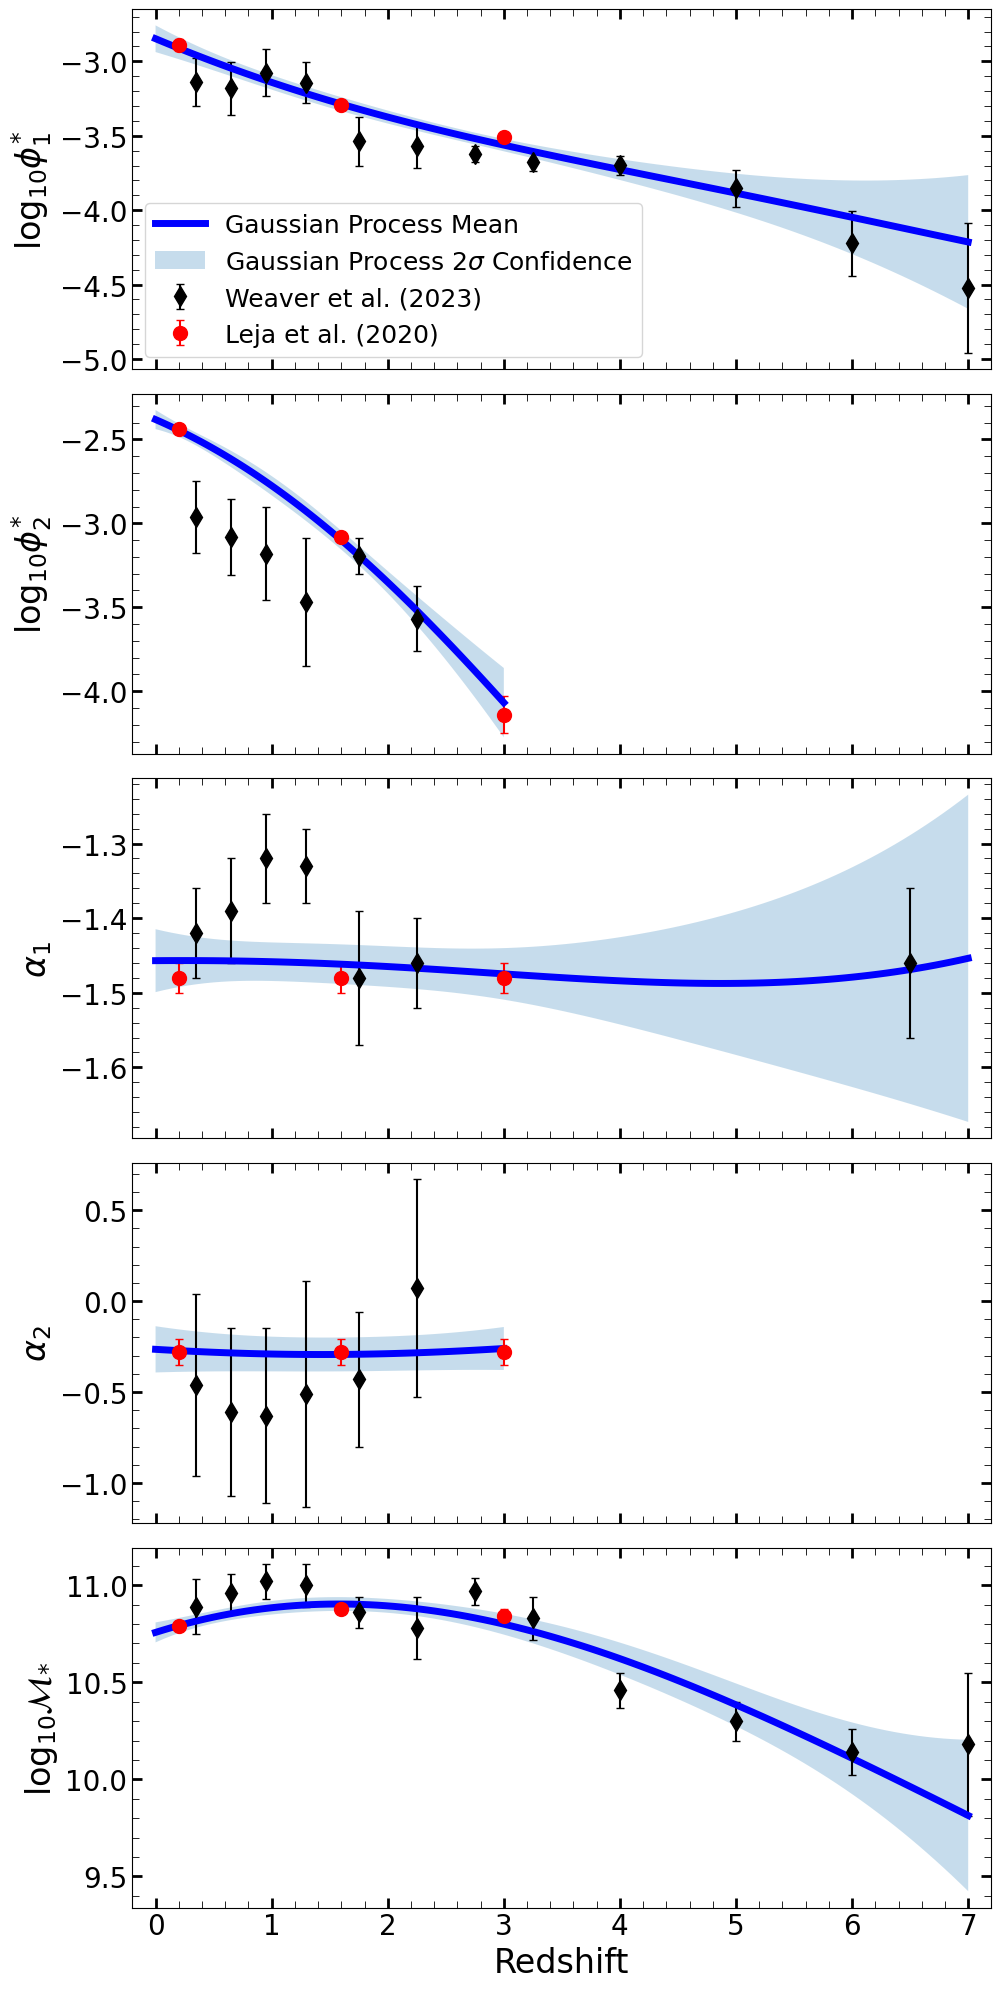

In [9]:
mass_function_prior = gpmf.MassFunctionPrior('.')

mass_function_prior.plot_confidence()

In [29]:
nden_reals = []
for i in range(0, 1000):
    sparams = mass_function_prior.sample_prior()
    n_tot = mass_function_prior.total_number(sparams)
    nden = n_tot/(utils.LSST_AREA_ARCMIN2)
    nden_reals.append(nden)

nmean = np.mean(nden_reals)
nstd = np.std(nden_reals)

print("Total Number Density: ",nmean,"+/-",nstd)

Total Number Density:  1844.6228444546032 +/- 172.9925013430531


In [ ]:
n_prior_samples = 100
nsamples=200000
zbins = np.arange(0.0, 7.0, 0.1)
mbins = np.arange(7, 13, 0.1)

zarr=[]
marr=[]
for i in range(n_prior_samples):
    zsamples, msamples = mass_function_prior.sample_log_n(nsamples)
    z_histogram = np.histogram(zsamples, bins=zbins, density=True)
    m_histogram = np.histogram(msamples, bins=mbins, density=True)

    zarr.append(z_histogram[0])
    marr.append(m_histogram[0])




In [ ]:
f, ax = plt.subplots(1, 2, figsize=(20, 7))

zs = np.vstack(np.array(zarr))
ms = np.vstack(np.array(marr))

zs_mean = np.mean(zs, axis=0)
zs_std = 2*np.std(zs, axis=0)
ax[0].plot((zbins[:-1]+zbins[1:])/2, zs_mean, lw=4, ms=3)
ax[0].fill_between((zbins[:-1]+zbins[1:])/2, zs_mean-zs_std,  zs_mean+zs_std, alpha=0.25)
ax[0].set_xlabel('Redshift $z$', fontsize=18)
ax[0].tick_params('x', labelsize=16, width=2, size=5, direction='in', top=True)
ax[0].tick_params('y', labelsize=16, width=2, size=5, direction='in', right=True)
#for curve in zarr:
    #ax[0].plot((zbins[:-1]+zbins[1:])/2, curve, alpha=0.1, c='purple')

ms_mean = np.mean(ms, axis=0)
ms_std = 2*np.std(ms, axis=0)
ax[1].plot((mbins[:-1]+mbins[1:])/2, ms_mean,lw=4)
ax[1].fill_between((mbins[:-1]+mbins[1:])/2, ms_mean-ms_std,  ms_mean+ms_std, alpha=0.25)
ax[1].set_xlabel('Logarithmic Mass $\mathcal{M}$', fontsize=18)
ax[1].tick_params('x', labelsize=16, width=2, size=5, direction='in', top=True)
ax[1].tick_params('y', labelsize=16, width=2, size=5, direction='in', right=True)
#for curve in marr:
    #ax[1].plot((mbins[:-1]+mbins[1:])/2, curve, alpha=0.1, c='purple')

In [ ]:
cmap = plt.get_cmap('viridis')
print(cmap)

redshift = np.array([0.5, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0])
masses = np.linspace(8, 12, 15)
nsamples = 1000
for z in redshift:
    mfunc_at_z = []
    for n in range(nsamples):
        mfunc = mass_function_prior.mass_function(z, masses, mass_function_prior.sample_prior())
        mfunc_at_z.append(mfunc)

    mfunc_at_z = np.vstack(np.array(mfunc_at_z))
    mfunc_at_z_mean = np.mean(mfunc_at_z, axis=0)
    mfunc_at_z_std = np.std(mfunc_at_z, axis=0)
    #mfunc_at_z_quantile = np.quantile(mfunc_at_z, 0.85, axis=0)
    plt.errorbar(masses, mfunc_at_z_mean, yerr=mfunc_at_z_std, color=cmap(z/7), marker="o", ls=' ', ms=4, label="z="+str(z), capsize=3)
    plt.fill_between(masses, mfunc_at_z_mean-mfunc_at_z_std,  mfunc_at_z_mean+mfunc_at_z_std, color=cmap(z/7), alpha=0.2)
            
plt.ylim(1e-8, 1e-1)
plt.ylabel("Mass Function $\Phi(\mathcal{M}, z) [\mathrm{Mpc}^{-3}\mathrm{dex}^{-1}]$", fontsize=16)
plt.xlabel("Logarithmic Mass $\mathcal{M}$", fontsize=16)
#plt.tick_params('x', labelsize=18, width=2, size=5)
#plt.tick_params('y', labelsize=18, width=2, size=5)
plt.yscale('log')
plt.legend(loc="best")